In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from plotly import graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as plt
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Raw Data/estatura.csv",encoding = "ISO-8859-1")

In [3]:
df = df.loc[df["Sex"] == 1]

In [4]:
df.head(2)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,24.0,0.941524,86.452201,0.040322,79.910844,80.729773,81.991714,84.102892,86.452201,88.805249,90.926191,92.196879,93.022654
1,1,24.5,1.007208,86.861609,0.040396,80.260371,81.088685,82.364010,84.494706,86.861609,89.228048,91.357530,92.631767,93.459230


In [5]:
#Seleccionamos las columnas que nos interesan
selected_columns = df[["Agemos","P50"]]
df = selected_columns.copy()
df.head(3)

,Agemos,P50
0,24.0,86.452201
1,24.5,86.861609
2,25.5,87.652473


In [6]:
df.tail(3)

,Agemos,P50
215,238.5,176.825490
216,239.5,176.841491
217,240.0,176.849232


In [7]:
df = df.loc[df["Agemos"] > 81]

In [8]:
df = df.loc[df["Agemos"] < 153]

In [9]:
df['Month'] = df['Agemos']

In [10]:
df.shape

(72, 3)

In [11]:
df.head(3)

,Agemos,P50,Month
58,81.5,120.455433,81.5
59,82.5,120.982136,82.5
60,83.5,121.507214,83.5


In [12]:
df["Month"].replace({81.5: 12, 93.5: 12, 105.5: 12, 117.5: 12, 129.5: 12, 141.5: 12}, inplace=True)
df["Month"].replace({82.5: 11, 94.5: 11, 106.5: 11, 118.5: 11, 130.5: 11, 142.5: 11}, inplace=True)
df["Month"].replace({83.5: 10, 95.5: 10, 107.5: 10, 119.5: 10, 131.5: 10, 143.5: 10}, inplace=True)
df["Month"].replace({84.5: 9, 96.5: 9, 108.5: 9, 120.5: 9, 132.5: 9, 144.5: 9}, inplace=True)
df["Month"].replace({85.5: 8, 97.5: 8, 109.5: 8, 121.5: 8, 133.5: 8, 145.5: 8}, inplace=True)
df["Month"].replace({86.5: 7, 98.5: 7, 110.5: 7, 122.5: 7, 134.5: 7, 146.5: 7}, inplace=True)
df["Month"].replace({87.5: 6, 99.5: 6, 111.5: 6, 123.5: 6, 135.5: 6, 147.5: 6}, inplace=True)
df["Month"].replace({88.5: 5, 100.5: 5, 112.5: 5, 124.5: 5, 136.5: 5, 148.5: 5}, inplace=True)
df["Month"].replace({89.5: 4, 101.5: 4, 113.5: 4, 125.5: 4, 137.5: 4, 149.5: 4}, inplace=True)
df["Month"].replace({90.5: 3, 102.5: 3, 114.5: 3, 126.5: 3, 138.5: 3, 150.5: 3}, inplace=True)
df["Month"].replace({91.5: 2, 103.5: 2, 115.5: 2, 127.5: 2,139.5: 2, 151.5: 2}, inplace=True)
df["Month"].replace({92.5: 1, 104.5: 1, 116.5: 1, 128.5: 1,140.5: 1, 152.5: 1}, inplace=True)


In [13]:
c = df.groupby("Month")
est = c.mean()


In [14]:
est['P50'].round(decimals = 2)


Month
1.0     139.75
2.0     139.27
3.0     138.79
4.0     138.32
5.0     137.84
6.0     137.37
7.0     136.90
8.0     136.43
9.0     135.96
10.0    135.49
11.0    135.02
12.0    134.56
Name: P50, dtype: float64

In [15]:
est = est.round(decimals = 2)

In [16]:
est['resta'] = 134.56

In [17]:
est['crecimiento'] = est['P50'] - est['resta']

In [18]:
est['Month'] = df.Month

In [19]:
selected_columns = est[["crecimiento"]]
est = selected_columns.copy()


In [20]:
est.reset_index(level=0, inplace=True)


In [21]:
est.to_csv('../../Data/crecimientofinal.csv', encoding='utf-8')

In [22]:
df7 = pd.read_csv("../../Data/cantera7.csv",encoding = "ISO-8859-1")

In [23]:
c = df7.groupby("month")
aa = c.count()

In [24]:
aa.reset_index(level=0, inplace=True)

In [25]:
aa['Jugadores'] = aa['Nombre']

In [26]:
selected_columns = aa[["month","Jugadores"]]
aa = selected_columns.copy()

In [27]:
dfg = pd.concat([est, aa], axis=1)

In [28]:
selected_columns = dfg[["month","Jugadores", "crecimiento"]]
dfg = selected_columns.copy()

In [29]:
dfg['Futbolistas'] = dfg.Jugadores / dfg.Jugadores.sum()*100

In [30]:
dfg = dfg.round(decimals = 2)

In [31]:
selected_columns = dfg[["month","Futbolistas", "crecimiento"]]
dfg = selected_columns.copy()

<AxesSubplot:xlabel='month', ylabel='Futbolistas'>

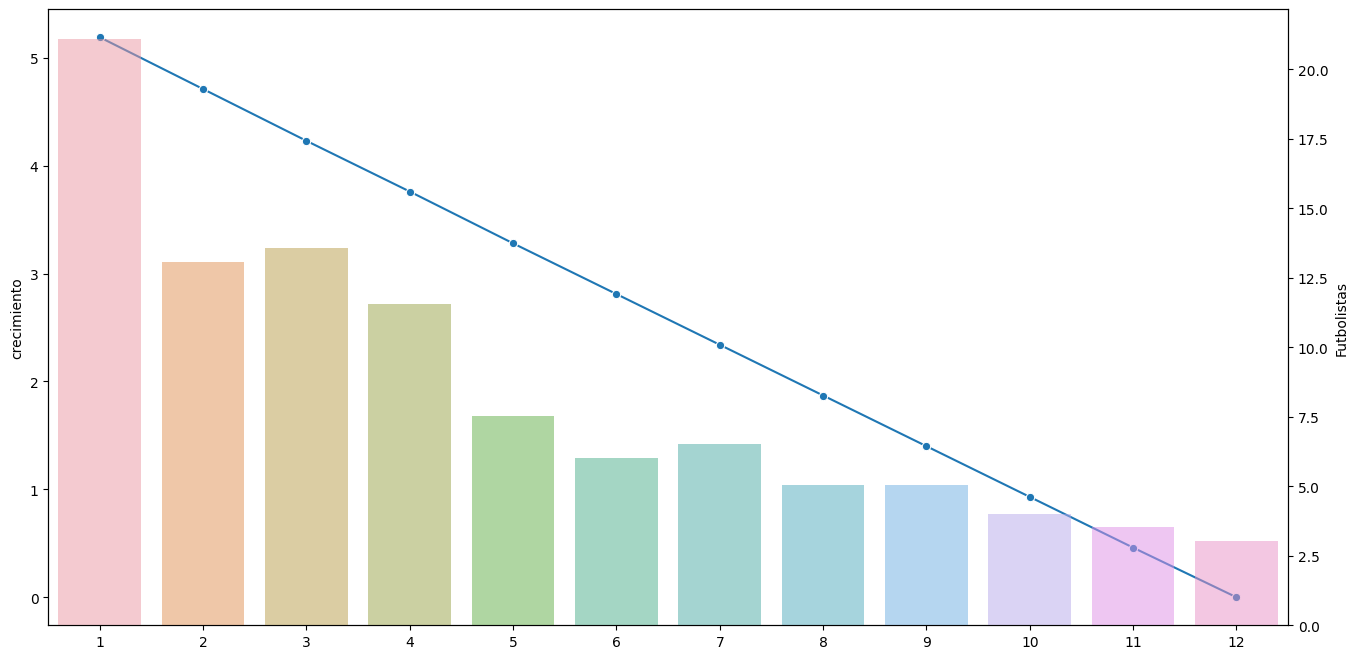

In [32]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(16,8))

sns.lineplot(data = dfg['crecimiento'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = dfg, x='month', y='Futbolistas', alpha=0.5, ax=ax2)

In [33]:
dfg.to_csv('../../Data/canterayaltura.csv', encoding='utf-8')